In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


import wrangle, scale
from pydataset import data

from sklearn.cluster import KMeans

In [2]:
iris = data("iris")
iris[:1]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa


In [3]:
#create target 
X = iris[['Sepal.Length', 'Sepal.Width']]

In [4]:
#Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

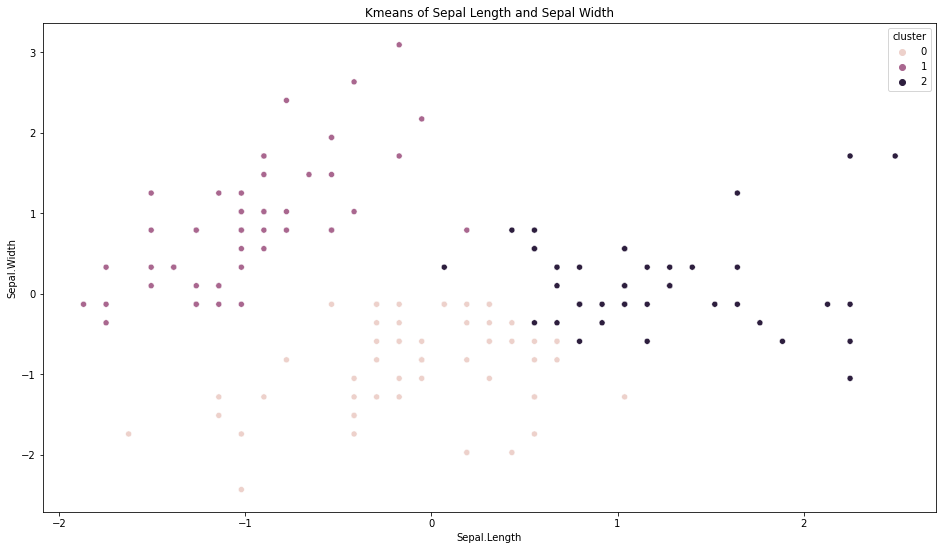

In [6]:
plt.figure(figsize=(16,9))
plt.title('Kmeans of Sepal Length and Sepal Width')
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', data = X_scaled, hue = 'cluster')
plt.show()

In [7]:
iris['cluster'] = X_scaled.cluster

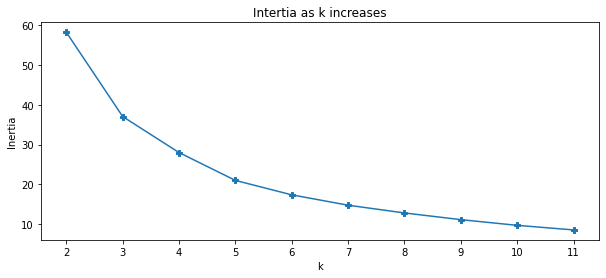

In [14]:
#elbow method to see how many clusters i should have
plt.figure(figsize=(10,4))
pd.Series({k:KMeans(k).fit(X).inertia_ for k in range(2,12)}).plot(marker='P')
plt.xticks(range(2,12))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title("Intertia as k increases")
plt.show()

In [11]:
# looks like 3 might be our best bet

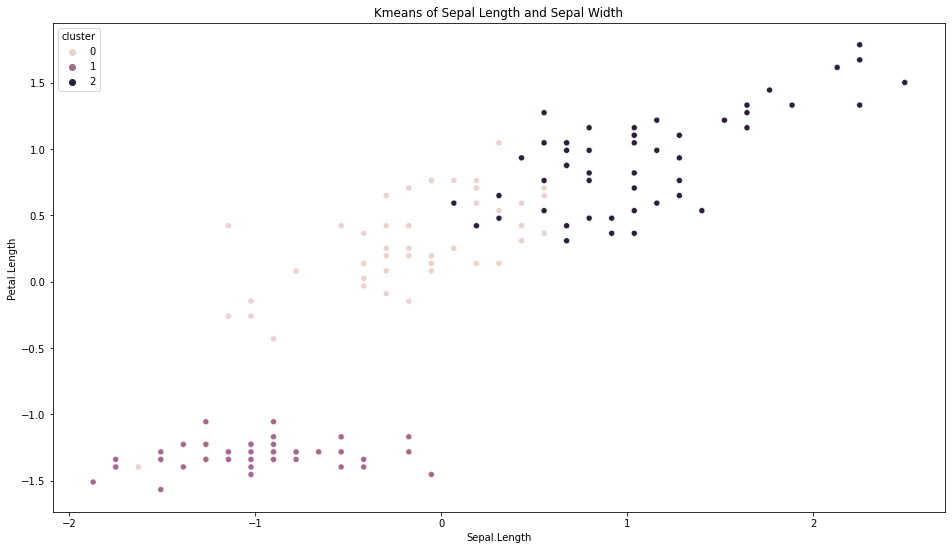

In [19]:
#repeat with 3 features
X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)


plt.figure(figsize=(16,9))
plt.title('Kmeans of Sepal Length and Sepal Width')
sns.scatterplot(x='Sepal.Length', y='Petal.Length', data = X_scaled, hue = 'cluster')
plt.show()

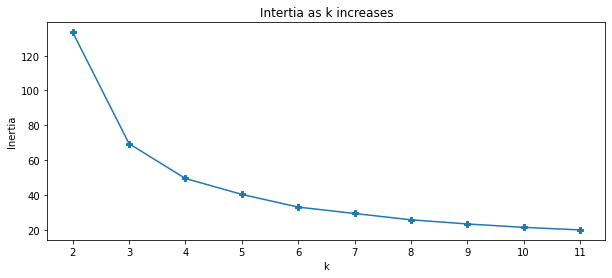

In [20]:
#elbow method to see how many clusters i should have
plt.figure(figsize=(10,4))
pd.Series({k:KMeans(k).fit(X).inertia_ for k in range(2,12)}).plot(marker='P')
plt.xticks(range(2,12))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title("Intertia as k increases")
plt.show()

In [21]:
#looks like 3 clusters is the best to use here

### Same stuff but now on mall customers

In [25]:
mall = pd.read_csv('mall_customers.csv')
mall[:1]

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39


In [24]:
#lets see possible clusters for age and spending score

<AxesSubplot:xlabel='age', ylabel='spending_score'>

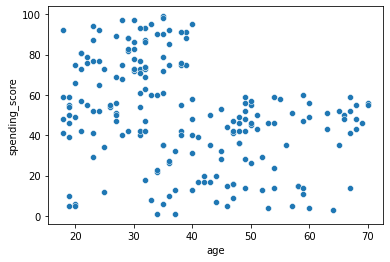

In [28]:
sns.scatterplot(x='age', y='spending_score', data = mall)

In [29]:
#possibly 4 clusters, lets see what K means says

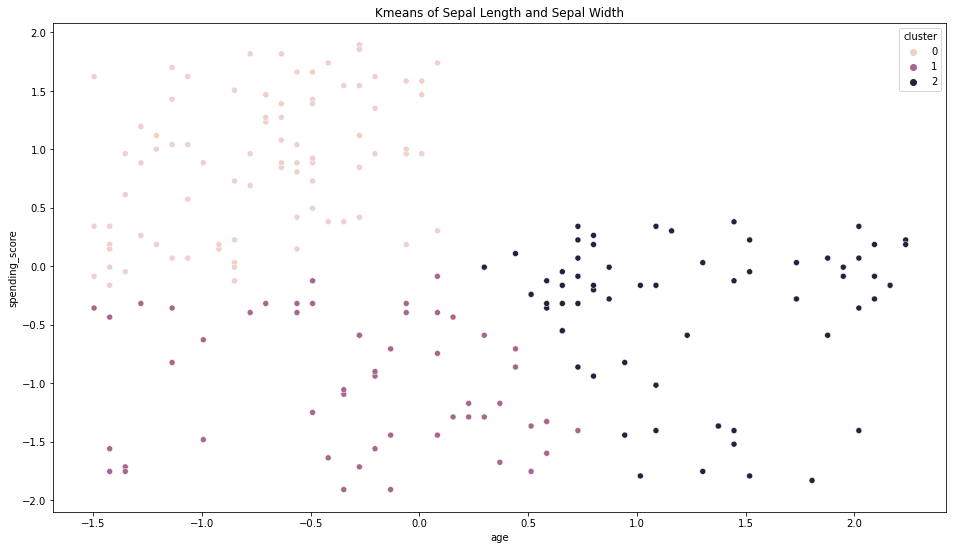

In [33]:
X = mall[['age', 'spending_score']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)


plt.figure(figsize=(16,9))
plt.title('Kmeans of Sepal Length and Sepal Width')
sns.scatterplot(x='age', y='spending_score', data = X_scaled, hue = 'cluster')
plt.show()

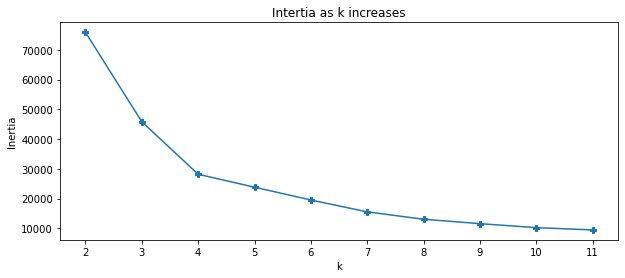

In [34]:
plt.figure(figsize=(10,4))
pd.Series({k:KMeans(k).fit(X).inertia_ for k in range(2,12)}).plot(marker='P')
plt.xticks(range(2,12))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title("Intertia as k increases")
plt.show()

In [35]:
#looks like 2-3 clusters are in this one

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

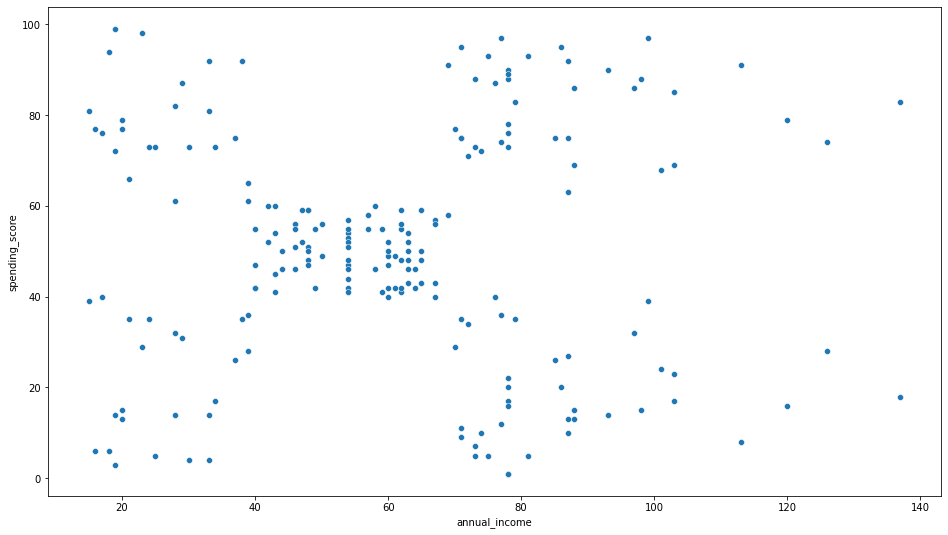

In [38]:
#lets check age to salary
plt.figure(figsize=(16,9))
sns.scatterplot(x='annual_income', y='spending_score', data = mall)

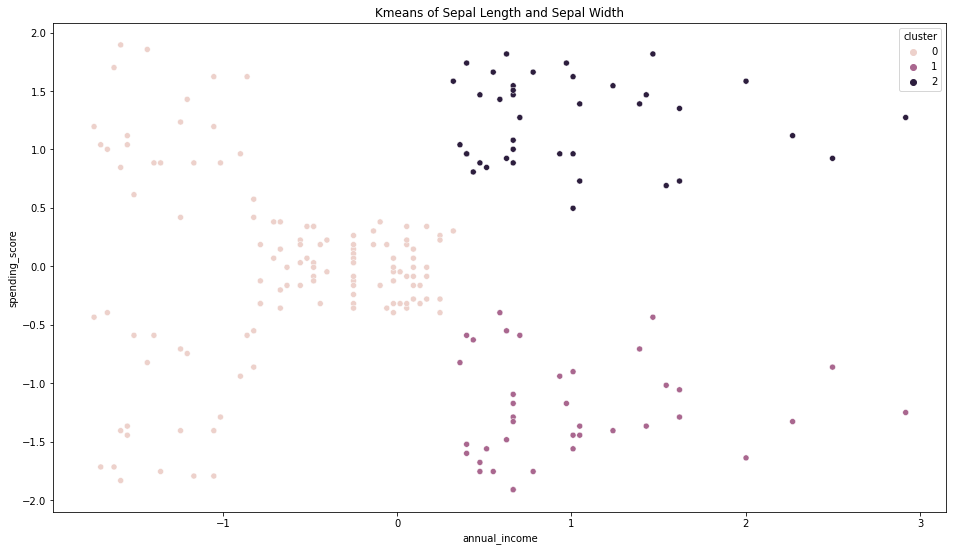

In [40]:
# I visually see 5 clusters. lets check
X = mall[['annual_income', 'spending_score']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

plt.figure(figsize=(16,9))
plt.title('Kmeans of Sepal Length and Sepal Width')
sns.scatterplot(x='annual_income', y='spending_score', data = X_scaled, hue = 'cluster')
plt.show()

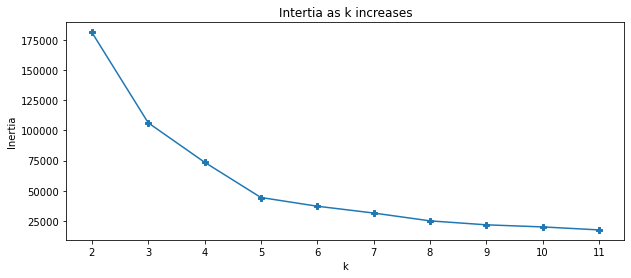

In [41]:
plt.figure(figsize=(10,4))
pd.Series({k:KMeans(k).fit(X).inertia_ for k in range(2,12)}).plot(marker='P')
plt.xticks(range(2,12))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title("Intertia as k increases")
plt.show()

In [42]:
#inpact in increasing k until 5, well use 5

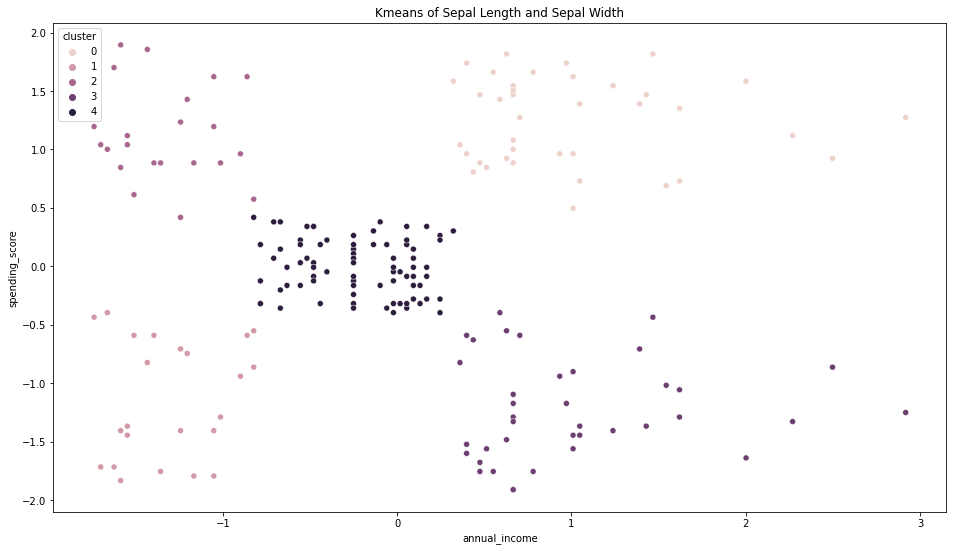

In [43]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

plt.figure(figsize=(16,9))
plt.title('Kmeans of Sepal Length and Sepal Width')
sns.scatterplot(x='annual_income', y='spending_score', data = X_scaled, hue = 'cluster')
plt.show()

### Impact on Scaling

In [60]:
pokemon = pd.read_csv('Pokemon.csv')

In [88]:
pokemon[:1]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


## ATTACK VS SPEED

### Not Scaled

<ipython-input-80-829174cb82cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


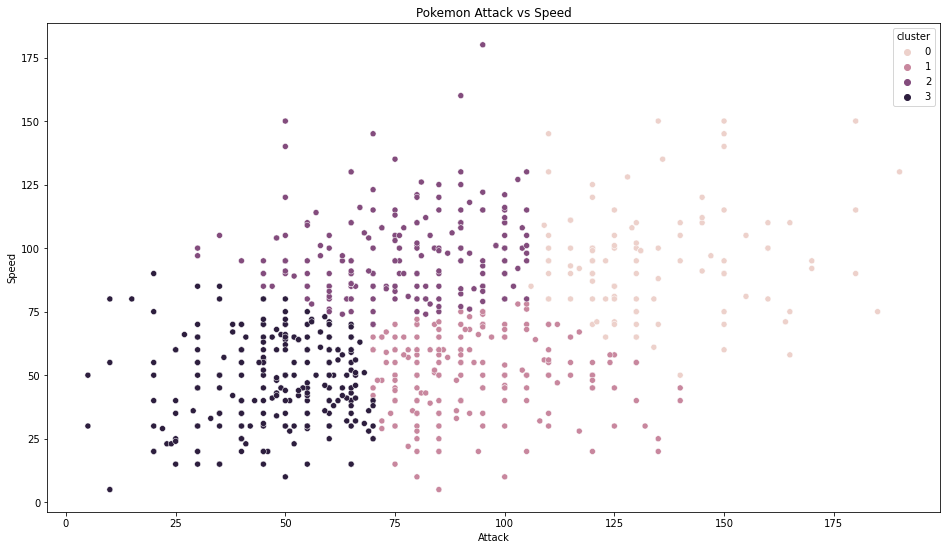

In [80]:
# I visually see 5 clusters. lets check
X = pokemon[['Attack', 'Speed']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

plt.figure(figsize=(16,9))
plt.title('Pokemon Attack vs Speed')
sns.scatterplot(x='Attack', y='Speed', data = X, hue = 'cluster')
plt.show()

### VS Scaled

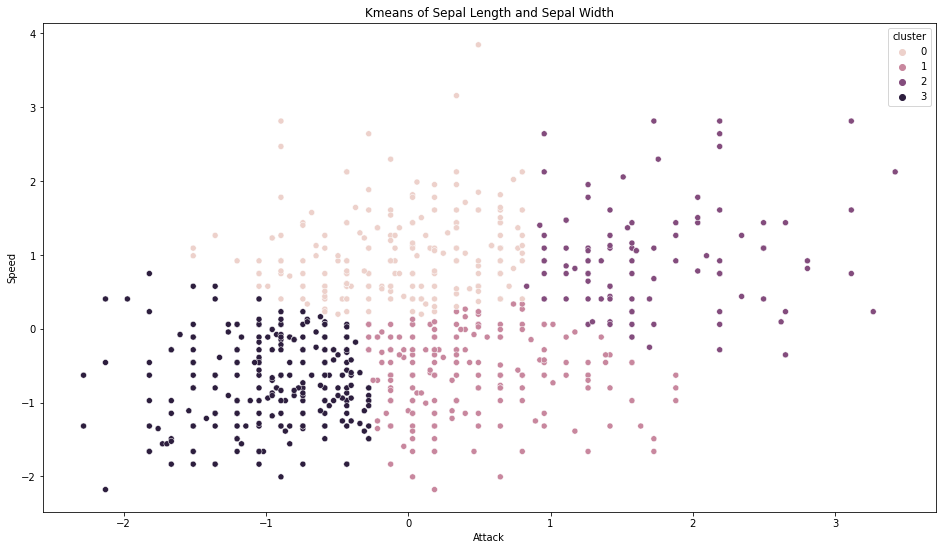

In [87]:

X = pokemon[['Attack', 'Speed']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

plt.figure(figsize=(16,9))
plt.title('Kmeans of Sepal Length and Sepal Width')
sns.scatterplot(x='Attack', y='Speed', data = X_scaled, hue = 'cluster')
plt.show()

In [75]:
# in terms of this example, all intergers are in the same unit of measure, so scaling doesnt hurt nor aid

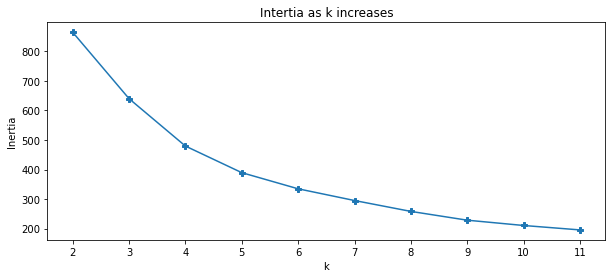

In [77]:
#lets see if there are any useable clusters in this dataset
plt.figure(figsize=(10,4))
pd.Series({k:KMeans(k).fit(X_scaled).inertia_ for k in range(2,12)}).plot(marker='P')
plt.xticks(range(2,12))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title("Intertia as k increases")
plt.show()

In [83]:
#possible 4 clusters
#Weak and slow,
#Weak but fast,
#Strong but slow
#Strong and fast